In [328]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from werkzeug.debug.repr import missing

In [329]:
# Load the CSV file
file_path = 'mixed_playlist.csv'
df = pd.read_csv(file_path)

# Display basic information
df.head()


,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2024,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2022,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2020,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2022,alpha


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3591 non-null   object 
 1   album             3591 non-null   object 
 2   artist            3600 non-null   object 
 3   release_date      3600 non-null   object 
 4   length            3600 non-null   int64  
 5   popularity        3600 non-null   int64  
 6   acousticness      3600 non-null   float64
 7   danceability      3600 non-null   float64
 8   energy            3600 non-null   float64
 9   instrumentalness  3600 non-null   float64
 10  liveness          3600 non-null   float64
 11  loudness          3600 non-null   float64
 12  speechiness       3600 non-null   float64
 13  tempo             3600 non-null   float64
 14  valence           3600 non-null   float64
 15  time_signature    3600 non-null   int64  
 16  key               3600 non-null   int64  


In [331]:
df.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
count,3.600000e+03,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,2.408759e+05,32.188333,0.451029,0.559205,0.503709,0.277072,0.164358,-10.720054,0.084946,115.102004,0.389938,3.866111,5.305556,0.464167,2007.343056
std,1.037588e+05,25.478877,0.358561,0.194051,0.260155,0.380640,0.141533,6.320428,0.093436,28.835005,0.256795,0.475421,3.504845,0.498784,101.071018
min,0.000000e+00,0.000000,0.000011,0.000000,0.000545,0.000000,0.017900,-42.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.865740e+05,0.000000,0.086675,0.429000,0.298750,0.000002,0.094100,-13.130750,0.036500,93.856500,0.163000,4.000000,2.000000,0.000000,2011.000000
50%,2.218130e+05,34.000000,0.404500,0.583000,0.528000,0.003100,0.112000,-8.879500,0.046400,114.982500,0.362000,4.000000,5.000000,0.000000,2016.000000
75%,2.699260e+05,52.000000,0.817000,0.707000,0.717000,0.718250,0.168000,-6.375500,0.086300,131.000750,0.583000,4.000000,8.000000,1.000000,2018.000000
max,1.921683e+06,91.000000,0.996000,0.971000,0.991000,0.995000,0.991000,-0.908000,0.952000,209.596000,0.981000,5.000000,11.000000,1.000000,2022.000000


In [343]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', dayfirst=False)

# Convert release_year to integer (if it’s not already in int)
df['release_year'] = df['release_year'].astype(int)

# Convert popularity, length, etc. to integer (if necessary)
df['popularity'] = df['popularity'].astype(int)
df['length'] = df['length'].astype(int)

# Convert certain columns to float (if required)
df['acousticness'] = df['acousticness'].astype(float)
df['danceability'] = df['danceability'].astype(float)
df['energy'] = df['energy'].astype(float)
df['instrumentalness'] = df['instrumentalness'].astype(float)

# Convert columns like 'user' or 'album' to string (if needed)
df['user'] = df['user'].astype(str)
df['album'] = df['album'].astype(str)

# Verify changes
print(df.dtypes)


name                        object
album                       object
artist                      object
release_date        datetime64[ns]
length                       int64
popularity                   int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
time_signature               int64
key                          int64
mode                         int64
uri                         object
release_year                 int64
top_year                    object
user                        object
dtype: object


In [344]:
# Count missing values in each column
missing_summary = df.isnull().sum()
print("Missing values:\n", missing_summary)

# Check for duplicates
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

df.shape[0]

Missing values:
 name                  9
album                 0
artist                0
release_date        179
length                0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
time_signature        0
key                   0
mode                  0
uri                   0
release_year          0
top_year              0
user                  0
dtype: int64
Number of duplicate rows: 0


3498

In [345]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print("Number of rows after removing duplicates:", df.shape[0])


Number of rows after removing duplicates: 3498


In [346]:
# Get the number of columns
df.shape[0]


3498

In [347]:
# Replace 'unknown' with NaN for easier handling
df.replace('unknown', pd.NA, inplace=True)

# Drop rows where 'top_year' or 'user' contains NaN (missing values)
df.dropna(subset=['top_year', 'user'], inplace=True)

# Verify the result
print(df[['top_year', 'user']].head())


  top_year   user
1     2024  delta
2     2022  gamma
3     2020  gamma
4     2022  alpha
5     2020  delta


In [348]:
# Drop duplicate rows
mixed_playlist = df.drop_duplicates()

# Verify duplicates are removed
print("Number of rows after removing duplicates:", mixed_playlist.shape[0])


Number of rows after removing duplicates: 3498


In [349]:
# Get the number of columns
num_columns = df.shape[1]
print("Number of columns:", num_columns)


Number of columns: 22


In [350]:
mixed_playlist = mixed_playlist.dropna()

# Verify no missing values remain
print(mixed_playlist.isnull().sum())


name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
top_year            0
user                0
dtype: int64


In [351]:
mixed_playlist['name']= mixed_playlist['name'].fillna('Unknown Name')
mixed_playlist['album']= mixed_playlist['album'].fillna('Unknown Album')
mixed_playlist['user'] = mixed_playlist['user'].fillna('Unknown User')
mixed_playlist['top_year'] = mixed_playlist['top_year'].fillna('Unknown Year')

# Verify missing values are handled
print(df.isnull().sum())


name                  9
album                 0
artist                0
release_date        179
length                0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
time_signature        0
key                   0
mode                  0
uri                   0
release_year          0
top_year              0
user                  0
dtype: int64


In [353]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = r'D:\DATA ANALYTICS Sem 1\Machine Learning -- 1\Spotify project\Cleanmixed_playlist.csv'

mixed_playlist.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to:", cleaned_file_path)


Cleaned data saved to: D:\DATA ANALYTICS Sem 1\Machine Learning -- 1\Spotify project\Cleanmixed_playlist.csv


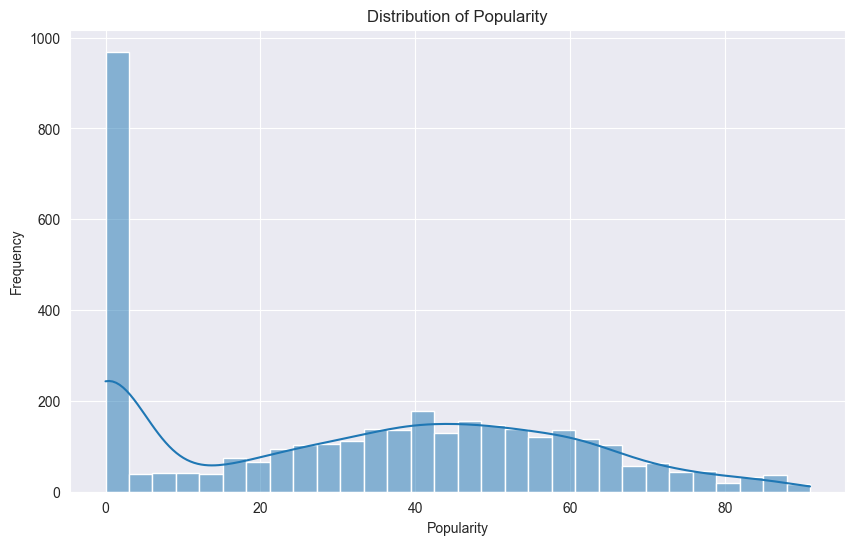

In [357]:


# Plot the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


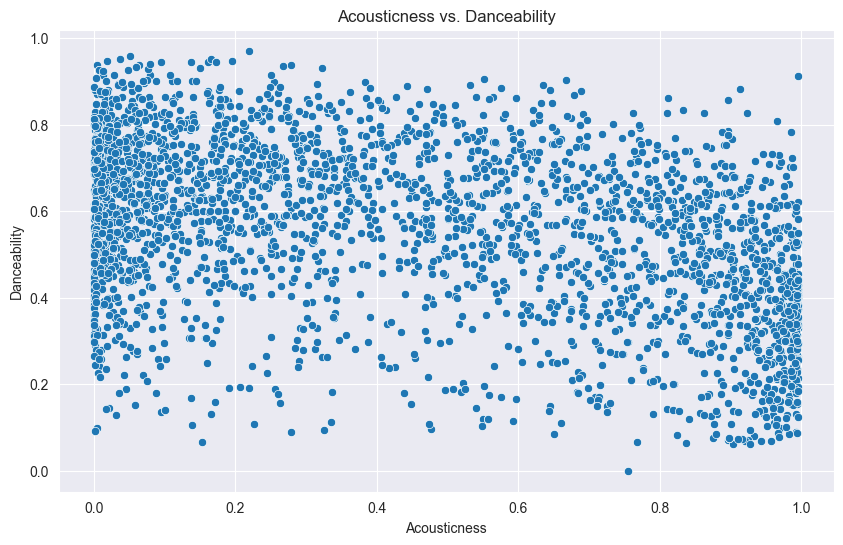

In [356]:
# Example: Plot a scatter plot of 'acousticness' vs. 'danceability'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='danceability', data=df)
plt.title('Acousticness vs. Danceability')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.show()


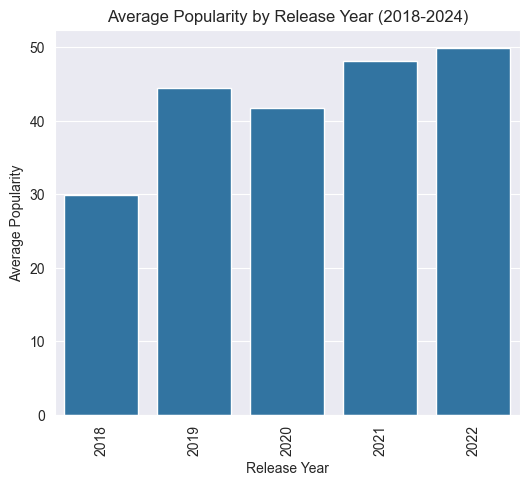

In [377]:

# Filter the data for years 2018 to 2024
df_filtered = df[df['release_year'].between(2018, 2024)]

# Group the filtered data by release year and calculate the average popularity for each year
yearly_popularity = df_filtered.groupby('release_year')['popularity'].mean().reset_index()

# Create a bar plot for years 2018-2024
plt.figure(figsize=(6, 5))
sns.barplot(x='release_year', y='popularity', data=yearly_popularity)
plt.title('Average Popularity by Release Year (2018-2024)')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()


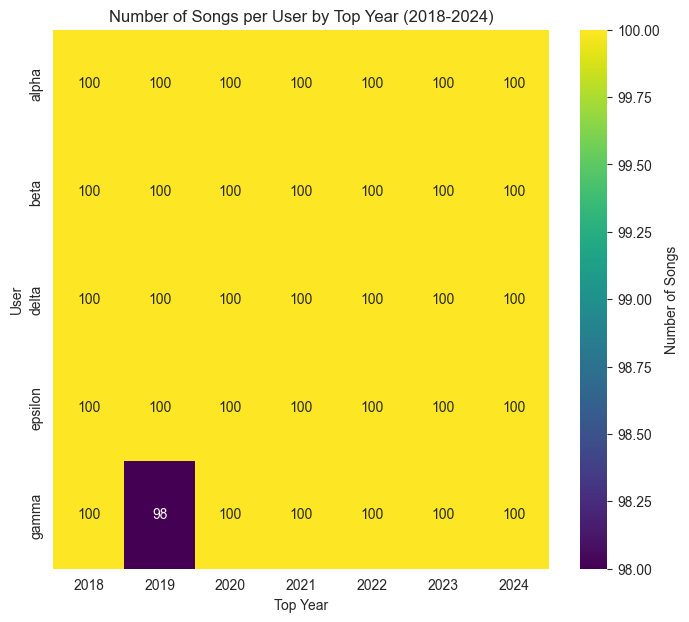

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'top_year' to numeric (if it's not already)
df['top_year'] = pd.to_numeric(df['top_year'], errors='coerce')

# Filter the data for top_year between 2018 and 2024
df_filtered = df[df['top_year'].between(2018, 2024)]

# Group the data by user and top_year, counting the number of songs per user per year
user_playlist = df_filtered.groupby(['user', 'top_year']).size().unstack(fill_value=0)

# Create a heatmap to visualize the distribution of songs across users and years
plt.figure(figsize=(8, 7))
sns.heatmap(user_playlist, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Number of Songs'})
plt.title('Number of Songs per User by Top Year (2018-2024)')
plt.xlabel('Top Year')
plt.ylabel('User')
plt.show()


C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_27628\2541183991.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, orient='h', palette='viridis')


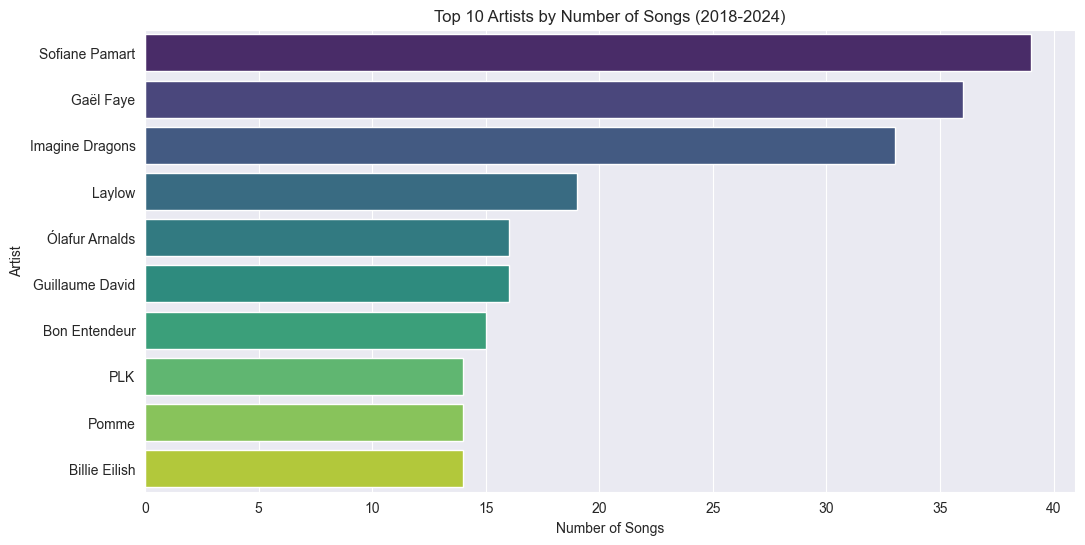

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for years 2018 to 2024
df_filtered = df[df['release_year'].between(2018, 2024)]

# Count the number of songs per artist for years 2018-2024
artist_counts = df_filtered['artist'].value_counts().head(10)

# Create a horizontal bar plot for the top 10 artists
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, orient='h', palette='viridis')
plt.title('Top 10 Artists by Number of Songs (2018-2024)')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()
